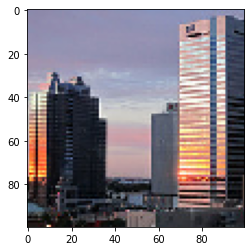

(100, 100, 3)
(1, 98, 98, 64)


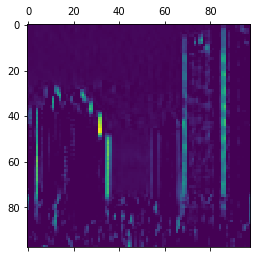

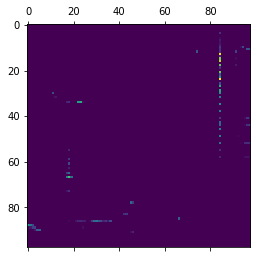

<ipython-input-5-a79ff35883d6>:82: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


IndexError: too many indices for array

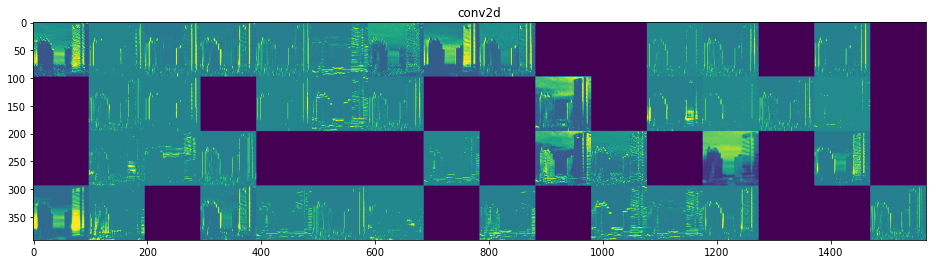

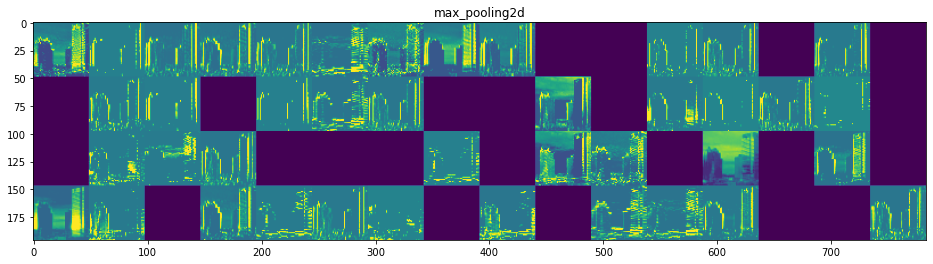

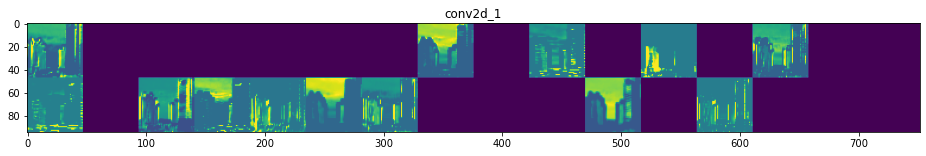

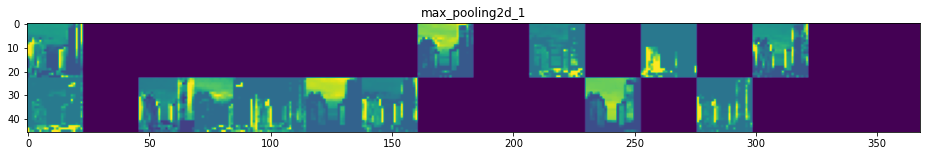

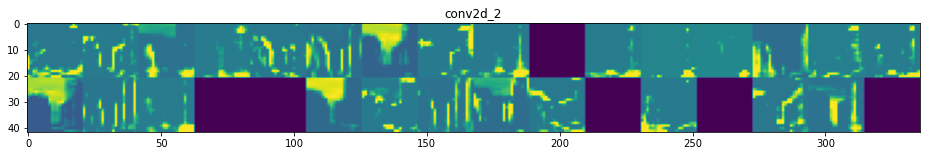

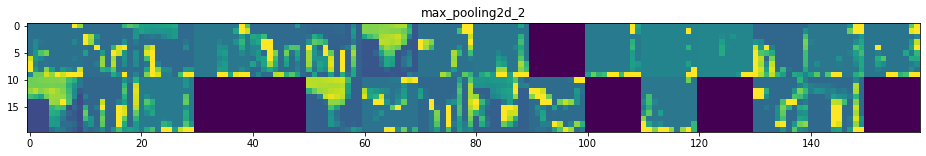

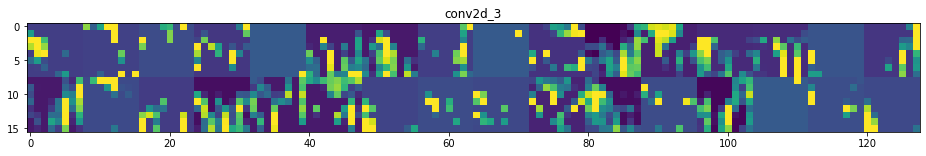

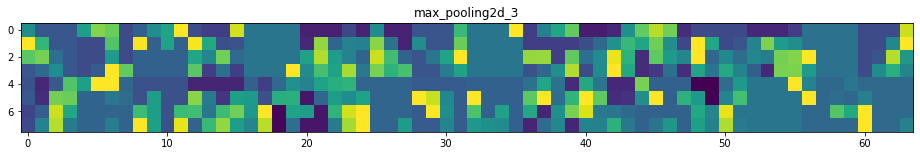

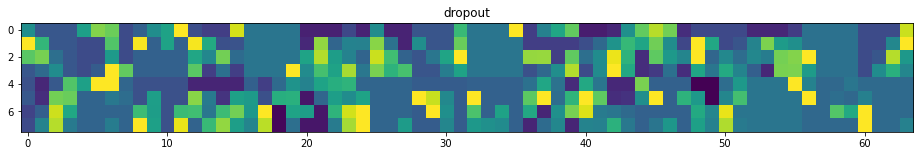

In [5]:
import keras
from keras import layers, models,optimizers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from skimage import filters
from sklearn.metrics import accuracy_score
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras import models

x_test = np.load("X_test.npy")
model_best = models.load_model('regularized_model.keras')

img = x_test[1]
img_tensor = x_test[1].reshape(1,x_test.shape[1], x_test.shape[2],x_test.shape[3])


plt.imshow(img)
plt.show()

# We preprocess the image into a 4D tensor
img_tensor = x_test[1]

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)


img_tensor = img_tensor.reshape(1,img_tensor.shape[0],img_tensor.shape[1],img_tensor.shape[2])
# Extracts the outputs of the top 5 layers:
layer_outputs = [layer.output for layer in model_best.layers]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model_best.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model_best.layers:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()